In [ ]:
#Name:Sreenidhi reddy Kalakonda
#700#: 700771953

Vedio link:https://drive.google.com/file/d/1QTo5S9FQJlxRVAbTjZ8oZ6NoxHw7IvEq/view?usp=sharing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD

In [ ]:
# Set seed for reproducibility
seed = 7
numpy.random.seed(seed)
#Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Normalize the image data to range between 0 and 1 by dividing by 255.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Get the number of output classes
num_classes = y_test.shape[1]

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
#Fully connected layer with ReLU activation and MaxNorm kernel constraint
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
# Output layer with softmax activation for multi-class classification
model.add(Dense(num_classes, activation='softmax'))

# Set hyperparameters for the training process
epochs = 25
lrate = 0.01
decay = lrate/epochs
# Use SGD optimizer with momentum
sgd = SGD(learning_rate=lrate, momentum=0.9, nesterov=False)
# Compile the model with categorical cross-entropy loss
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Print the model summary to view the architecture
print(model.summary())
# Train the model on the training data and validate it on the test data
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Evaluate the model on the test data and print the accuracy
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,210,090 (16.06 MB)

 Trainable params: 4,210,090 (16.06 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.3206 - loss: 1.8652 - val_accuracy: 0.5170 - val_loss: 1.3460
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.5101 - loss: 1.3592 - val_accuracy: 0.5799 - val_loss: 1.2193
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.5920 - loss: 1.1461 - val_accuracy: 0.6168 - val_loss: 1.0712
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.6547 - loss: 0.9830 - val_accuracy: 0.6371 - val_loss: 1.0299
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.6965 - loss: 0.8663 - val_accuracy: 0.6583 - val_loss: 0.9734
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7297 - loss: 0.7657 - val_accuracy: 0.6603 - val_loss: 0.9875
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7616 - loss: 0.6792 - val_accuracy: 0.6712 - val_loss: 0.9665
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7

## Task 1-

Follow the instruction below and then report how the performance changed.(apply all at once)

In [ ]:
seed = 7
numpy.random.seed(seed)
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Normalize image data to range between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Get number of output classes
num_classes = y_test.shape[1]
# Build a deeper CNN model
model_new = Sequential()
# First convolutional layer with MaxNorm kernel constraint
model_new.add(Conv2D(32, (3, 3), input_shape=(32,32,3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
# Dropout to reduce overfitting
model_new.add(Dropout(0.2))
# Second convolutional layer with MaxNorm kernel constraint
model_new.add(Conv2D(32, (3,3),activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
# Max pooling layer
model_new.add(MaxPooling2D(pool_size=(2, 2)))
# Third convolutional layer with MaxNorm kernel constraint
model_new.add(Conv2D(64, (3,3),padding='same', activation='relu',  kernel_constraint=MaxNorm(3)))
# Dropout to reduce overfitting
model_new.add(Dropout(0.2))
# Fourth convolutional layer with MaxNorm kernel constraint
model_new.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
# Max pooling layer
model_new.add(MaxPooling2D(pool_size=(2, 2)))
# Fifth convolutional layer with MaxNorm kernel constraint
model_new.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
# Dropout to reduce overfitting
model_new.add(Dropout(0.2))
# Sixth convolutional layer with MaxNorm kernel constraint
model_new.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
# Max pooling layer to downsample the feature map
model_new.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the feature map into 1D vector
model_new.add(Flatten())
# Dropout to reduce overfitting
model_new.add(Dropout(0.2))
# Fully connected layer with 1024 neurons and ReLU activation
model_new.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(3)))
# Dropout to reduce overfitting
model_new.add(Dropout(0.2))
# Fully connected layer with 512 neurons and ReLU activation
model_new.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model_new.add(Dropout(0.2))
# Output layer with softmax activation for multi-class classification
model_new.add(Dense(num_classes, activation='softmax'))
# Set hyperparameters for training
epochs = 25
lrate = 0.01
decay = lrate/epochs
# Use SGD optimizer with momentum and decay
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
# Compile the model with categorical cross-entropy loss
model_new.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Print model summary to view the architecture
print(model_new.summary())
# Train the model on the training data and validate on the test data
model_new_history = model_new.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Evaluate the model on the test data and print the accuracy
scores = model_new.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,915,114 (11.12 MB)

 Trainable params: 2,915,114 (11.12 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 62ms/step - accuracy: 0.2248 - loss: 2.0725 - val_accuracy: 0.4168 - val_loss: 1.5908
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 62ms/step - accuracy: 0.4483 - loss: 1.5059 - val_accuracy: 0.5238 - val_loss: 1.3250
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 62ms/step - accuracy: 0.5466 - loss: 1.2597 - val_accuracy: 0.6401 - val_loss: 1.0315
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.6230 - loss: 1.0595 - val_accuracy: 0.6728 - val_loss: 0.9520
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.6766 - loss: 0.9184 - val_accuracy: 0.6964 - val_loss: 0.8648
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.7073 - loss: 0.8332 - val_accuracy: 0.7225 - val_loss: 0.8127
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.7304 - loss: 0.7740 - val_accuracy: 0.7299 - val_loss: 0.7787
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.7

## Task 2
Predict the first 4 images of the test data using the above model. Then, compare with the actual label for those 4
images to check whether or not the model has predicted correctly

In [ ]:
import numpy as np
# Predict the labels for the first 4 test images using the trained model
Predictions = model_new.predict(X_test[:4])
# Get the actual labels for the first 4 test images
Actual = y_test[:4]
# Loop through each prediction and compare it to the actual label
for idx, Prediction in enumerate(Predictions):
    print("Image:", idx)# Print the index of the image being tested
    print(Prediction)
    print("Predictions:", np.argmax(Prediction), "Actual:", np.argmax(Actual[idx]))
    # Print the actual label
    print(Actual[idx])
    # Check if the prediction matches the actual label
    if np.argmax(Prediction) == np.argmax(Actual[idx]):
        print("Correct Prediction")# If the prediction is correct
    else:
        print("Incorrect Prediction")# If the prediction is incorrect


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Image: 0
[6.7827816e-04 4.2045364e-04 2.8277684e-03 6.4551258e-01 2.2376436e-03
 3.3997491e-01 5.2148202e-03 1.4240496e-03 9.0474181e-04 8.0478389e-04]
Predictions: 3 Actual: 3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Correct Prediction
Image: 1
[2.5626388e-03 3.7539424e-04 3.6654333e-06 1.4273628e-06 9.4066030e-07
 9.2335080e-07 1.5600096e-04 1.0079500e-08 9.9688953e-01 9.3892995e-06]
Predictions: 8 Actual: 8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Correct Prediction
Image: 2
[7.0592030e-03 4.6432915e-06 6.9187936e-06 1.8003663e-04 3.9396189e-05
 3.1769625e-05 3.1745406e-06 1.5540543e-05 9.9265176e-01 7.6571068e-06]
Predictions: 8 Actual: 8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Correct Prediction
Image: 3
[7.3945373e-01 2.1917513e-03 1.0307537e-01 2.4398293e-03 2.8633954e-02
 2.6244891e-04 5.4855715e-03 4.1827294e-03 1.0729414e-01 6.9804792e-03]
Predictions: 0 Actual: 0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Correct Prediction


 the first four images were loaded and the model accurately predicted all of them.

## Task 3.

Visualize Loss and Accuracy using the history object

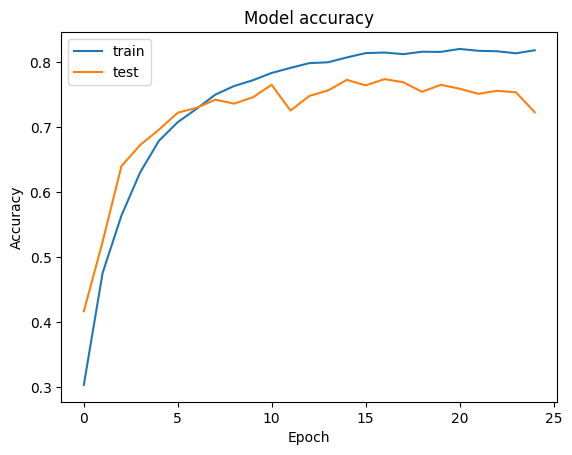

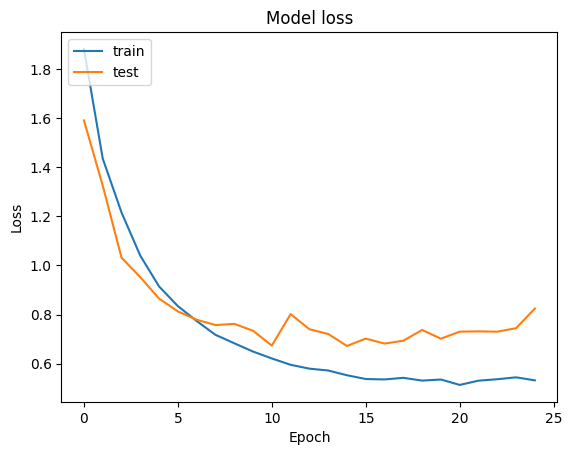

In [ ]:
import matplotlib.pyplot as plt

# Plot training accuracy vs validation accuracy across epochs
plt.plot(model_new_history.history['accuracy']) # Plot training accuracy
plt.plot(model_new_history.history['val_accuracy'])  # Plot validation accuracy
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# Display the accuracy plot

# Plot training loss vs validation loss across epochs
plt.plot(model_new_history.history['loss'])# Plot training loss
plt.plot(model_new_history.history['val_loss'])  # Plot validation loss
plt.title('Model loss')# Title for the loss plot
plt.ylabel('Loss') # Label for the y-axis
plt.xlabel('Epoch') # Label for the x-axis
plt.legend(['train', 'test'], loc='upper left')  # Legend to distinguish train and validation
plt.show()# Display the loss plot